# Introduction

In this notebooks we will explore the spatio-temporal variability of key oceanic variables 
that we can measure from space, i.e. Sea Surface Temperature (SST), Sea Surface Salinity (SSS) and Sea Level (SL).
We will start with the SST and we will follow a step by step approach. 
You're expected to follow the same approach for SSS and SL.

If you are not proficient in `xarray`, it might be difficult to go through the notebook. I recommend you start with the SST, where I provide more support, you can then move on to SSS and then Sea Level.

This notebook has been prepared by Adrien Martin from the National Oceanography Centre in January 2022. Modified by Phoebe Hudson 2023. 

In [2]:
# -*- coding: utf-8 -*-
import numpy as np
# import numpy.ma as ma
# import netCDF4 as nc
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
import xarray as xr
# import pandas as pd
# import dask.array as da
import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import scipy.io as spio
import datetime as dt
# import math as m
# from scipy.stats import norm, cauchy, laplace

import os
os.environ["PYPROJ_GLOBAL_CONTEXT"]="ON" #if plots are running slow, this may help

# Sea Surface Temperature
Nowadays, most global european datasets for the ocean are available on the Copernicus Marine Service (CMES) platform:

https://resources.marine.copernicus.eu/products

If you search for sea surface temperature and specify the "Regional domain" to be "Global Ocean", you should see 9 ocean products.
Among them, some are "Model assimilation" and others are "Observation".
The latter are the ones we are interested in today.
Among the "Observation" there are Level-4 (L4) and Level-3 (L3) products, with different integration time (hourly mean; daily mean).

https://resources.marine.copernicus.eu/product-detail/SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001/INFORMATION
using in-situ and satellite data from both infrared and microwave radiometers.

https://doi.org/10.48670/moi-00165

## load data
The data have already been compiled in a single file `OSITAMonthly_sub3.nc` that you downloaded from Google Drive (and subsetted for practical purposes).

You need to update the variable `fname` in order to correspond to the path of your file from the path of your notebook.

In [3]:
fname = './data/OSTIAMonthly_sub3.nc' 
ds1 = xr.open_dataset(fname)

Now we can have a look at what is inside this dataset by calling the dataset `ds1`. You can have access to the detail on each "coordinates" or "data variables" by "show attributes" and "show data repr" by clicking on the symbols at the end of each line.

This dataset covers January 2007 to December 2021 and covers the full globe with a regular grid of 0.25° in longitude and latitude.
Variables are `analysed_sst` and `standard_deviation_sst` and you can find details on these variables by clicking on the "attributes". In particular you get the scientific reference.

Global attributes of the product are available by clicking on the triangle of "Attributes".


/exports/csce/datastore/geos/users/s2112771/miniforge3/envs/sense-book/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/exports/csce/datastore/geos/users/s2112771/miniforge3/envs/sense-book/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/exports/csce/datastore/geos/users/s2112771/miniforge3/envs/sense-book/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


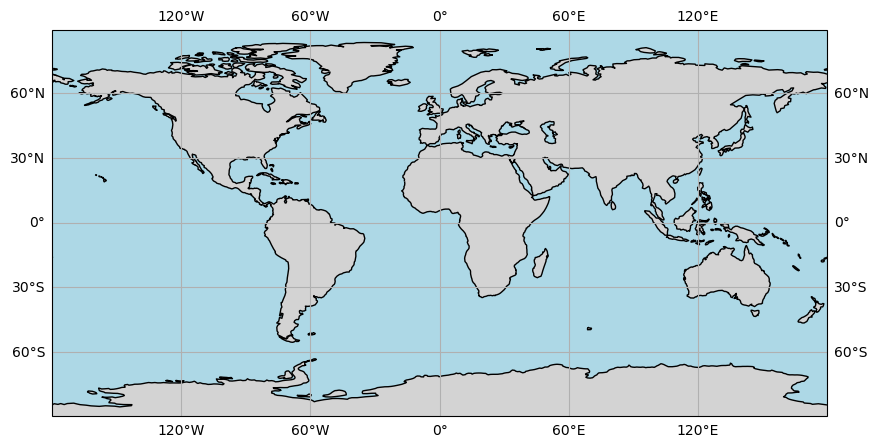

In [6]:
import cartopy.feature as cfeature

# Calculate the extent
lon_min = ds1.lon.min().values
lon_max = ds1.lon.max().values
lat_min = ds1.lat.min().values
lat_max = ds1.lat.max().values

# Plot the extent on a map
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.gridlines(draw_labels=True)
plt.show()


In [4]:
ds1

<xarray.Dataset> Size: 249MB
Dimensions:                 (lon: 480, lat: 240, time: 180)
Coordinates:
  * lon                     (lon) float32 2kB 0.125 0.875 1.625 ... 358.6 359.4
  * lat                     (lat) float32 960B -89.88 -89.12 ... 88.62 89.38
  * time                    (time) datetime64[ns] 1kB 2007-01-15T12:00:00 ......
Data variables:
    analysed_sst            (time, lat, lon) float32 83MB ...
    standard_deviation_sst  (time, lat, lon) float32 83MB ...
    sst                     (time, lat, lon) float32 83MB ...
Attributes: (12/46)
    Conventions:                CF-1.4
    title:                      Analysed monthly foundation sea surface tempe...
    references:                 Donlon, C.J., Martin, M., Stark, J.D., Robert...
    institution:                UKMO
    netcdf_version_id:          4.1
    product_version:            2.0
    ...                         ...
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

## Plot data
We will start by selecting a date by using either a label (as below) with the `.sel` method, or by using a numerical index using the `.isel` method.

We will then plot the `analysed_sst` field with all labels and title already filled in thanks to xarray and the attributes completed in the NetCDF file.

In [4]:
sel_date = '2015-01-15'

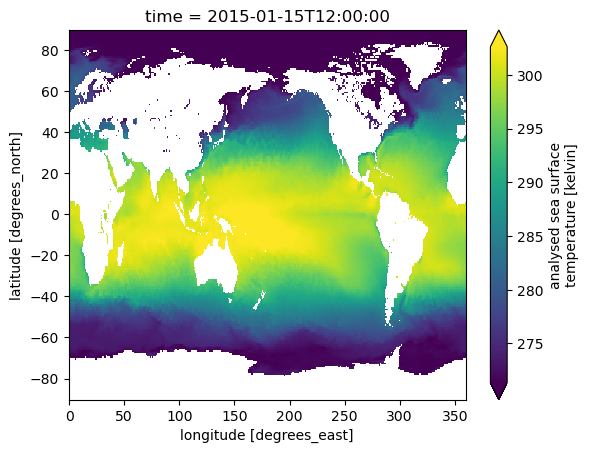

In [6]:
ds1.analysed_sst.sel(time=sel_date).plot(robust=True)
# the keyword robust=True is very useful for an automatic colorscale robust to outliers
# WARNING `.sel(time=sel_date)` should be exact, it does not use the closest value

The projection is not ideal so we will use "cartopy" to make it nicer. There are many different projections available, which tend either to conserve the shape (angle) or the area. See the links below for details:
- https://manifold.net/doc/radian/guide_to_selecting_map_projections.html
- https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html 
- https://en.wikipedia.org/wiki/Mollweide_projection

For global projection of the ocean we tend to prefer (pseudo) equal area projection. My preference is for `Robinson` and `Mollweide`.

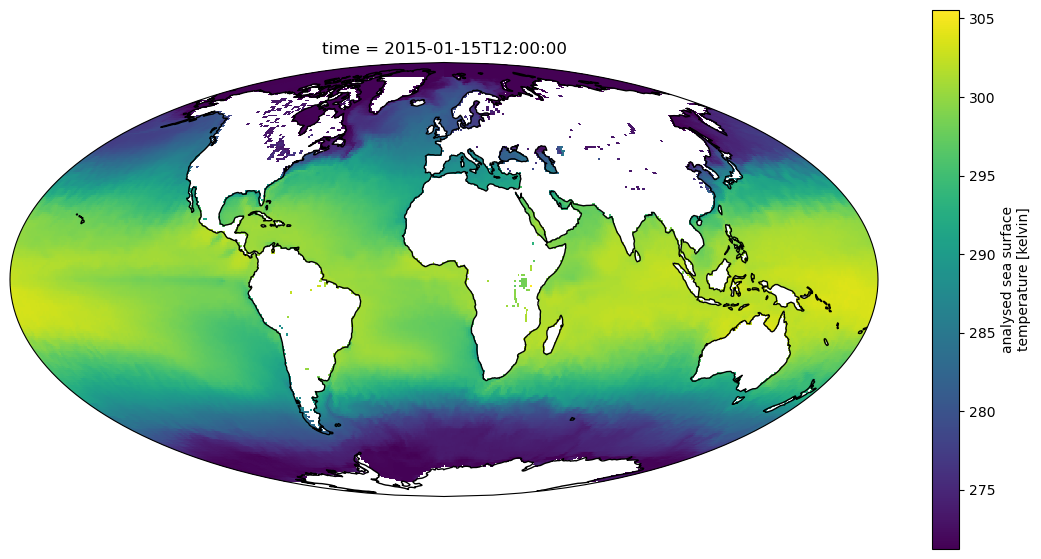

In [7]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide())
ax.coastlines(zorder=4)
ds1.analysed_sst.sel(time=sel_date).plot(transform=ccrs.PlateCarree())

The temperature is plotted in Kelvin, °Celsius is a more common unit for easy interpretation.
We could do the transformation directly on the xarray or by creating a new variable.
The latter is more suitable if we plan to reuse it often, as it will be our case.

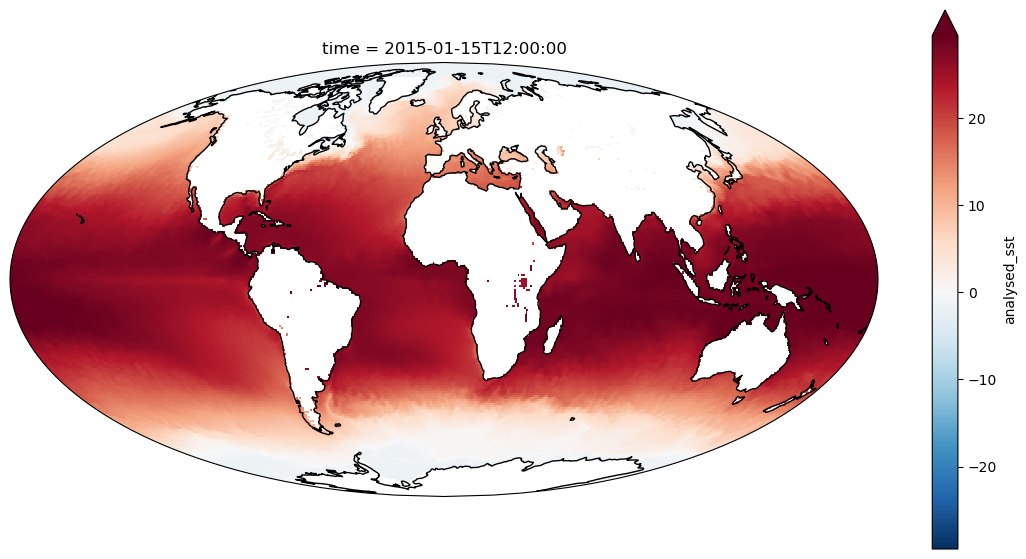

In [8]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide())
ax.coastlines(zorder=4)
(ds1.analysed_sst - 273.15).sel(time=sel_date).plot(transform=ccrs.PlateCarree(), robust=True)

In [9]:
ds1['sst'] = ds1.analysed_sst - 273.15
ds1.sst.attrs = {'long_name': 'analysed sea surface temperature',
                 'units': '°C'}

Other modifications to the map can involve the colormap (https://matplotlib.org/stable/tutorials/colors/colormaps.html), the color range (`vmin`, `vmax`), ...

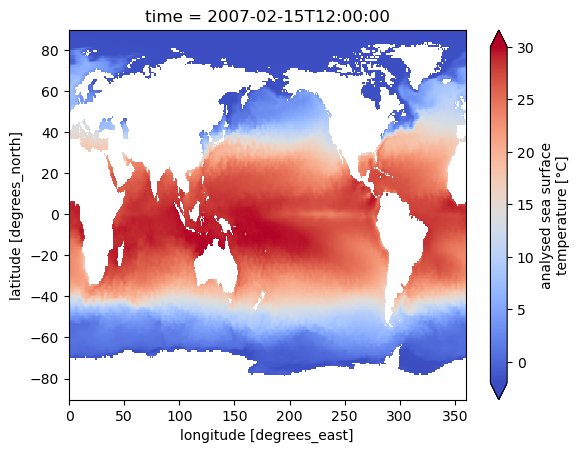

In [10]:
ds1.sst.isel(time=1).plot(vmin=-2, vmax=30, cmap='coolwarm')

## Data analysis
We have started to learn how to use xarray, manipulate the data and plot it.
In this section, we will do some data analysis to study spatio-temporal variability.

We will start by looking at the histogram of SST using the method `.plot.hist`. You can take the default but also define the `bins` either with an array, or with a number of bins.

Interpret what you observe (minimum, maximum, peak, ...). _Does this temperature range make sense?_

Is it coherent with what you observe with a pseudo equal area projection? With a standard `PlateCarree` projection?

(array([0.000000e+00, 2.400000e+02, 2.266500e+04, 2.583634e+06,
        4.676320e+05, 3.815270e+05, 3.292080e+05, 2.864340e+05,
        2.740860e+05, 2.660290e+05, 2.705330e+05, 2.616740e+05,
        2.610960e+05, 2.568880e+05, 2.545410e+05, 2.437740e+05,
        2.341980e+05, 2.279070e+05, 2.280520e+05, 2.276630e+05,
        2.322470e+05, 2.456740e+05, 2.616980e+05, 2.767200e+05,
        2.935280e+05, 3.080970e+05, 3.267780e+05, 3.546870e+05,
        3.891160e+05, 4.408630e+05, 5.338210e+05, 6.601740e+05,
        8.030120e+05, 8.984690e+05, 7.566290e+05, 1.594940e+05,
        5.956000e+03, 1.779000e+03, 9.040000e+02]),
 array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
        12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
        29, 30, 31, 32, 33, 34]),
 <BarContainer object of 39 artists>)

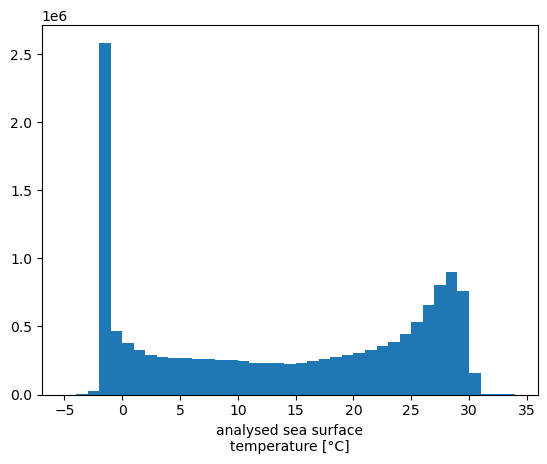

In [11]:
# use .plot.hist on ds1.sst
ds1.sst.plot.hist(bins=np.arange(-5,35,1))

### Averaging

Plot the average (`.mean`, ...) in `'time'`

_What do you see?_ 
_Can you notice any particular differences around coasts?_

Now, plot the standard deviation (`.std`).

_Do any regions stand out as having particularly high variability? Why do you think this might be?_

Now take the zonal average (IE the mean in `['time','lon']`)

_What do you notice?_

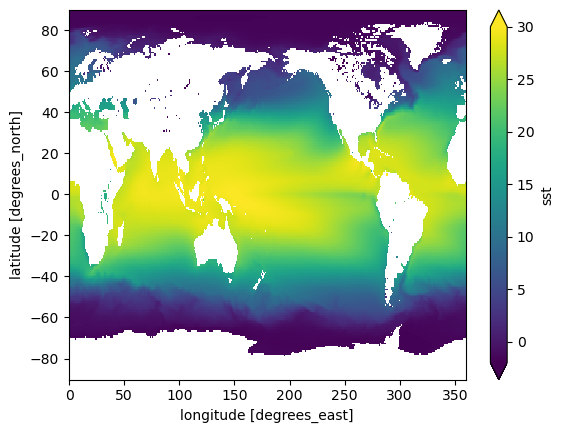

In [12]:
ds1.sst.mean(dim='time').plot(vmin=-2, vmax=30)
# I recommend to do one cell per plot, there is no obligation,
# but I find it easier to modify my code/figure

c:\Users\s2112771\Anaconda3\envs\sensecdt_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


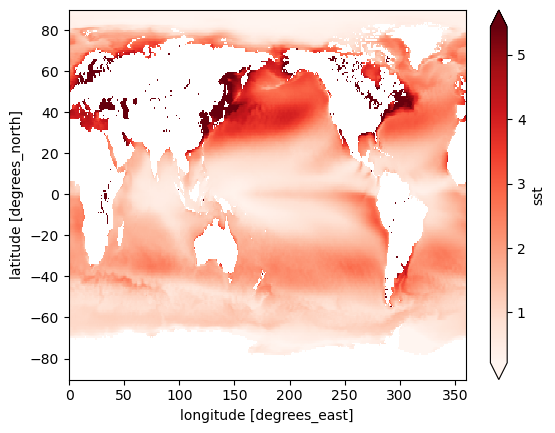

In [21]:
# std
ds1.sst.std(dim='time').plot(robust=True,cmap='Reds')


We can also remove the zonal average (`['time','lon']`) from the temporal 2D temporal mean.

_What regions stand out after doing this?_


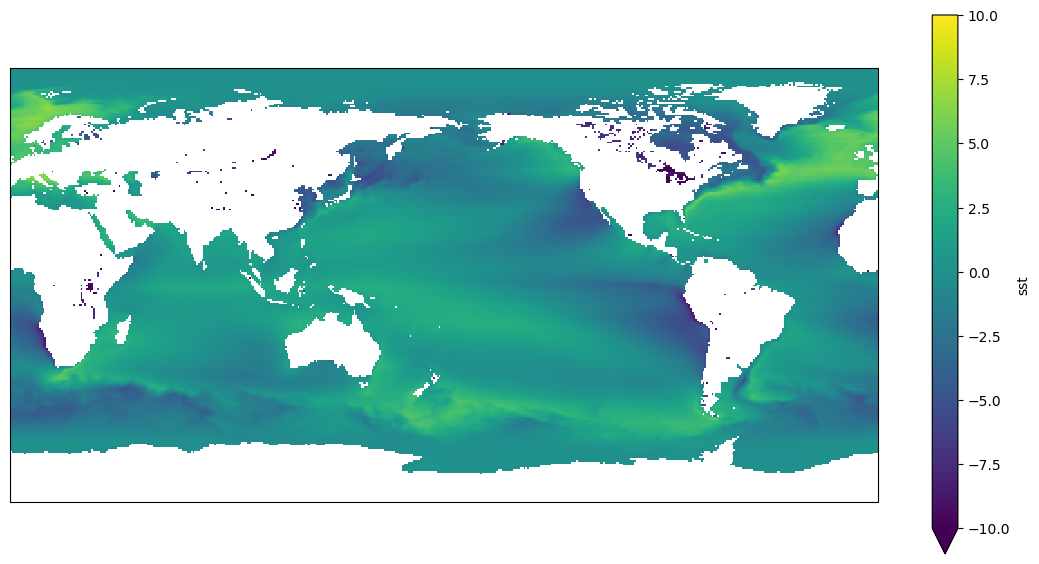

In [22]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide())
ax.coastlines(zorder=4)

# One way to substract one dataset to another could be:
(ds1.sst.mean(dim='time') - ds1.sst.mean(dim=['time','lon'])).plot(vmin=-10,vmax = 10, robust=True)

### Seasonal cycle

Plot the climatology of SST below for each month using `groupby` and `'time.month'`.
Then, do the same with `'time.season'`. 
In order to see the climatology, plot the climatology anomaly to the mean (e.g. temporal mean).


_After removing the mean, what monthly/seasonal patterns emerge?_

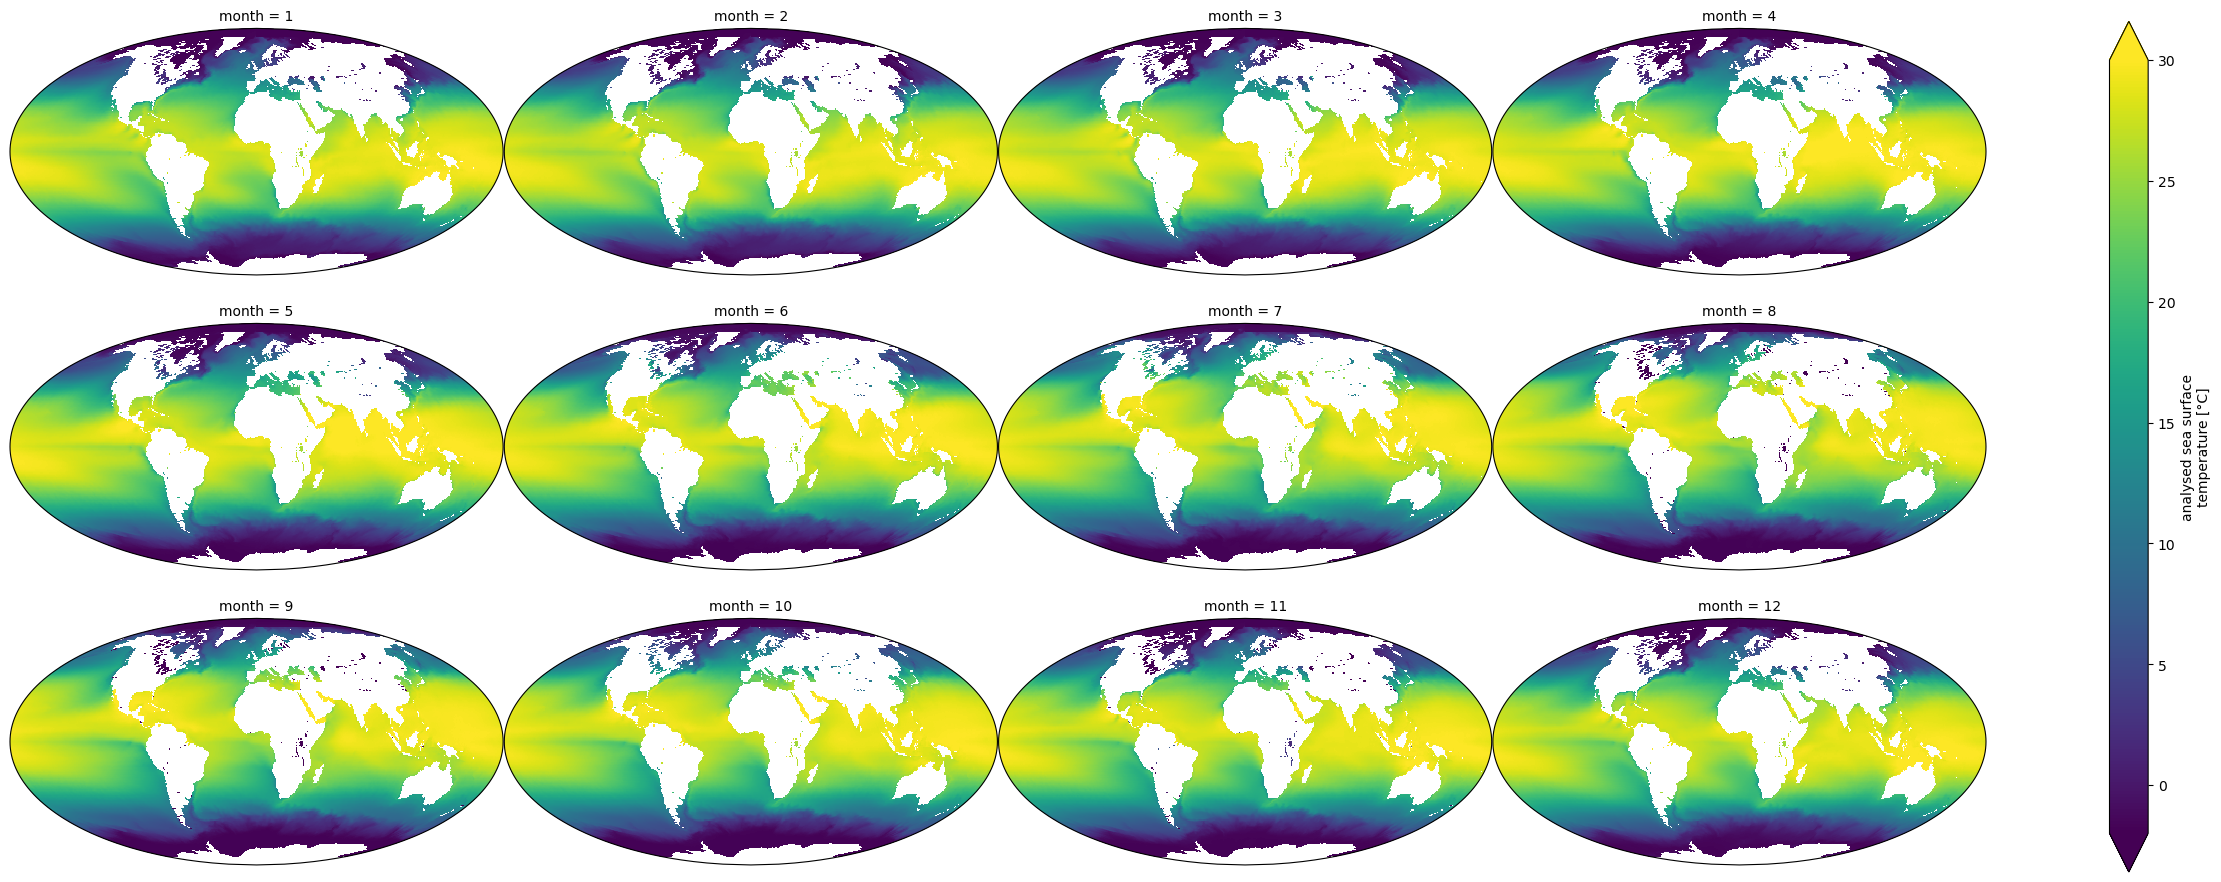

In [72]:
ds1.sst.groupby('time.month').mean(dim='time')\
    .plot(
        col='month', 
        col_wrap=4, 
        robust=True,
        vmin=-2, vmax=30,
        aspect=2, size=3,
        transform=ccrs.PlateCarree(), subplot_kws={'projection': ccrs.Mollweide()},
)

# Note that if the plots are running slowly, I recommend removing the last 2 lines
# (IE the transform and subplot_kws components)

In [83]:
ds1_season = ds1.sst.groupby('time.season').mean(dim='time')
# ds1_season.values
ds1_season

<xarray.DataArray 'sst' (season: 4, lat: 240, lon: 480)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7788886, -1.7788886, -1.778888 , ..., -1.7793329,
         -1.779111 , -1.7788886],
        [-1.783553 , -1.7833307, -1.7833307, ..., -1.783553 ,
         -1.783553 , -1.783553 ],
        [-1.7893311, -1.7891093, -1.7891093, ..., -1.7893311,
         -1.7893311, -1.7893311]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [-1.752219 , -1.7526631, -1.752885 , ..., -1.7511067,
         -1.7515516, -1.7517741],
        [-1.779109 , -1.7797756, -1.7808865, ..., -1.7755541,
         -1.7766656, -1.7779982],
        [-1.7857761, -1.7857767, -1.786221 , ..., -1.7844422,
         -1.7848871, -1.7853312]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.773997 , -1.7742188, -1.7742188, ..., -1.7737739,
         -1.7735515, -1.7737745],
        [-1.7839973, -1.7839973, -1.783553 , ..., -1.784219 ,
         -1.7839966, -1.7839973],
        [-1.7911079, -1.7911085, -1.7917758, ..., -1.7904413,
         -1.7904419, -1.7904419]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.125 0.875 1.625 2.375 ... 357.1 357.9 358.6 359.4
  * lat      (lat) float32 -89.88 -89.12 -88.38 -87.62 ... 87.88 88.62 89.38
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    long_name:  analysed sea surface temperature
    units:      °C

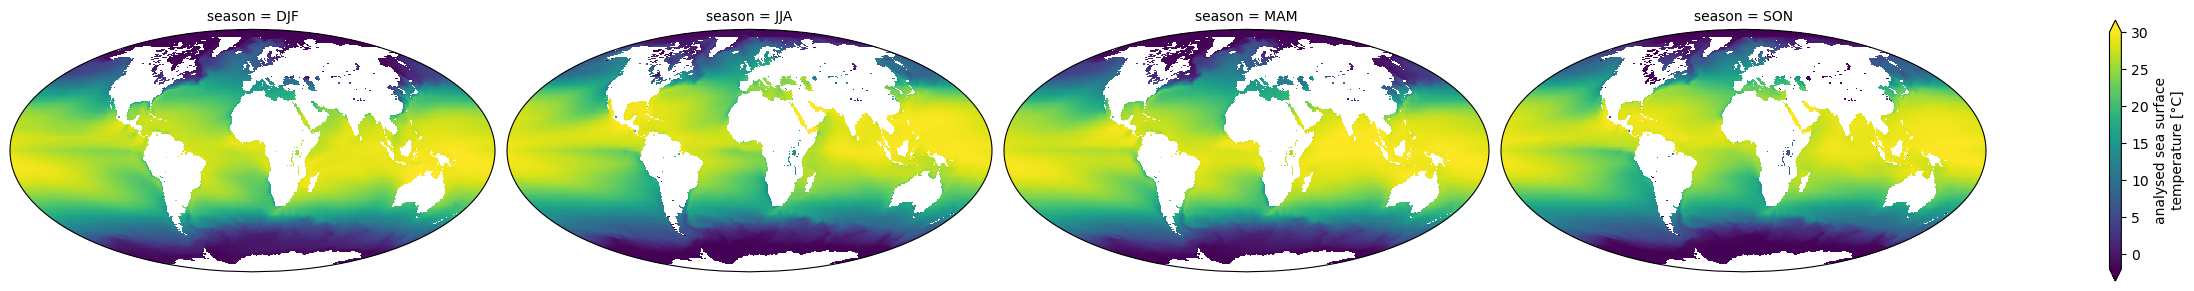

In [84]:
ds1.sst.groupby('time.season').mean(dim='time')\
    .plot(
        col='season', 
        col_wrap=4, 
        robust=True,
        vmin=-2, vmax=30,
        aspect=2, size=3,
        transform=ccrs.PlateCarree(), subplot_kws={'projection': ccrs.Mollweide()},
)

# Note that if the plots are running slowly, I recommend removing the last 2 lines
# (IE the transform and subplot_kws components)

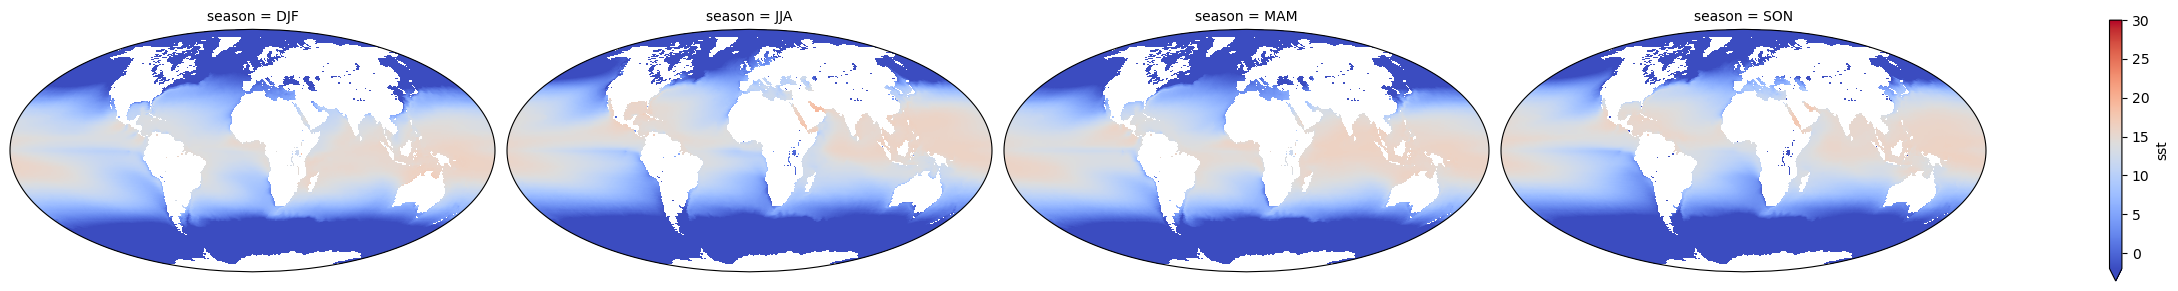

In [15]:
# Remove the annual, temporal mean or any other meaningful 'mean' to 
# the climatology to highlight the seasonal variability
# (ds1.sst.mean(dim='time') - ds1.sst.mean(dim=['time','lon']))

(ds1.sst.groupby('time.season').mean(dim='time')- np.nanmean(ds1.sst.values))\
    .plot(
        col='season', 
        col_wrap=4, 
        robust=True,
        vmin=-2, vmax=30,
        aspect=2, size=3,
        transform=ccrs.PlateCarree(), subplot_kws={'projection': ccrs.Mollweide()},
        cmap='coolwarm'
)


In [5]:
ds1_year = ds1.sst.groupby('time.year').mean(dim='time')

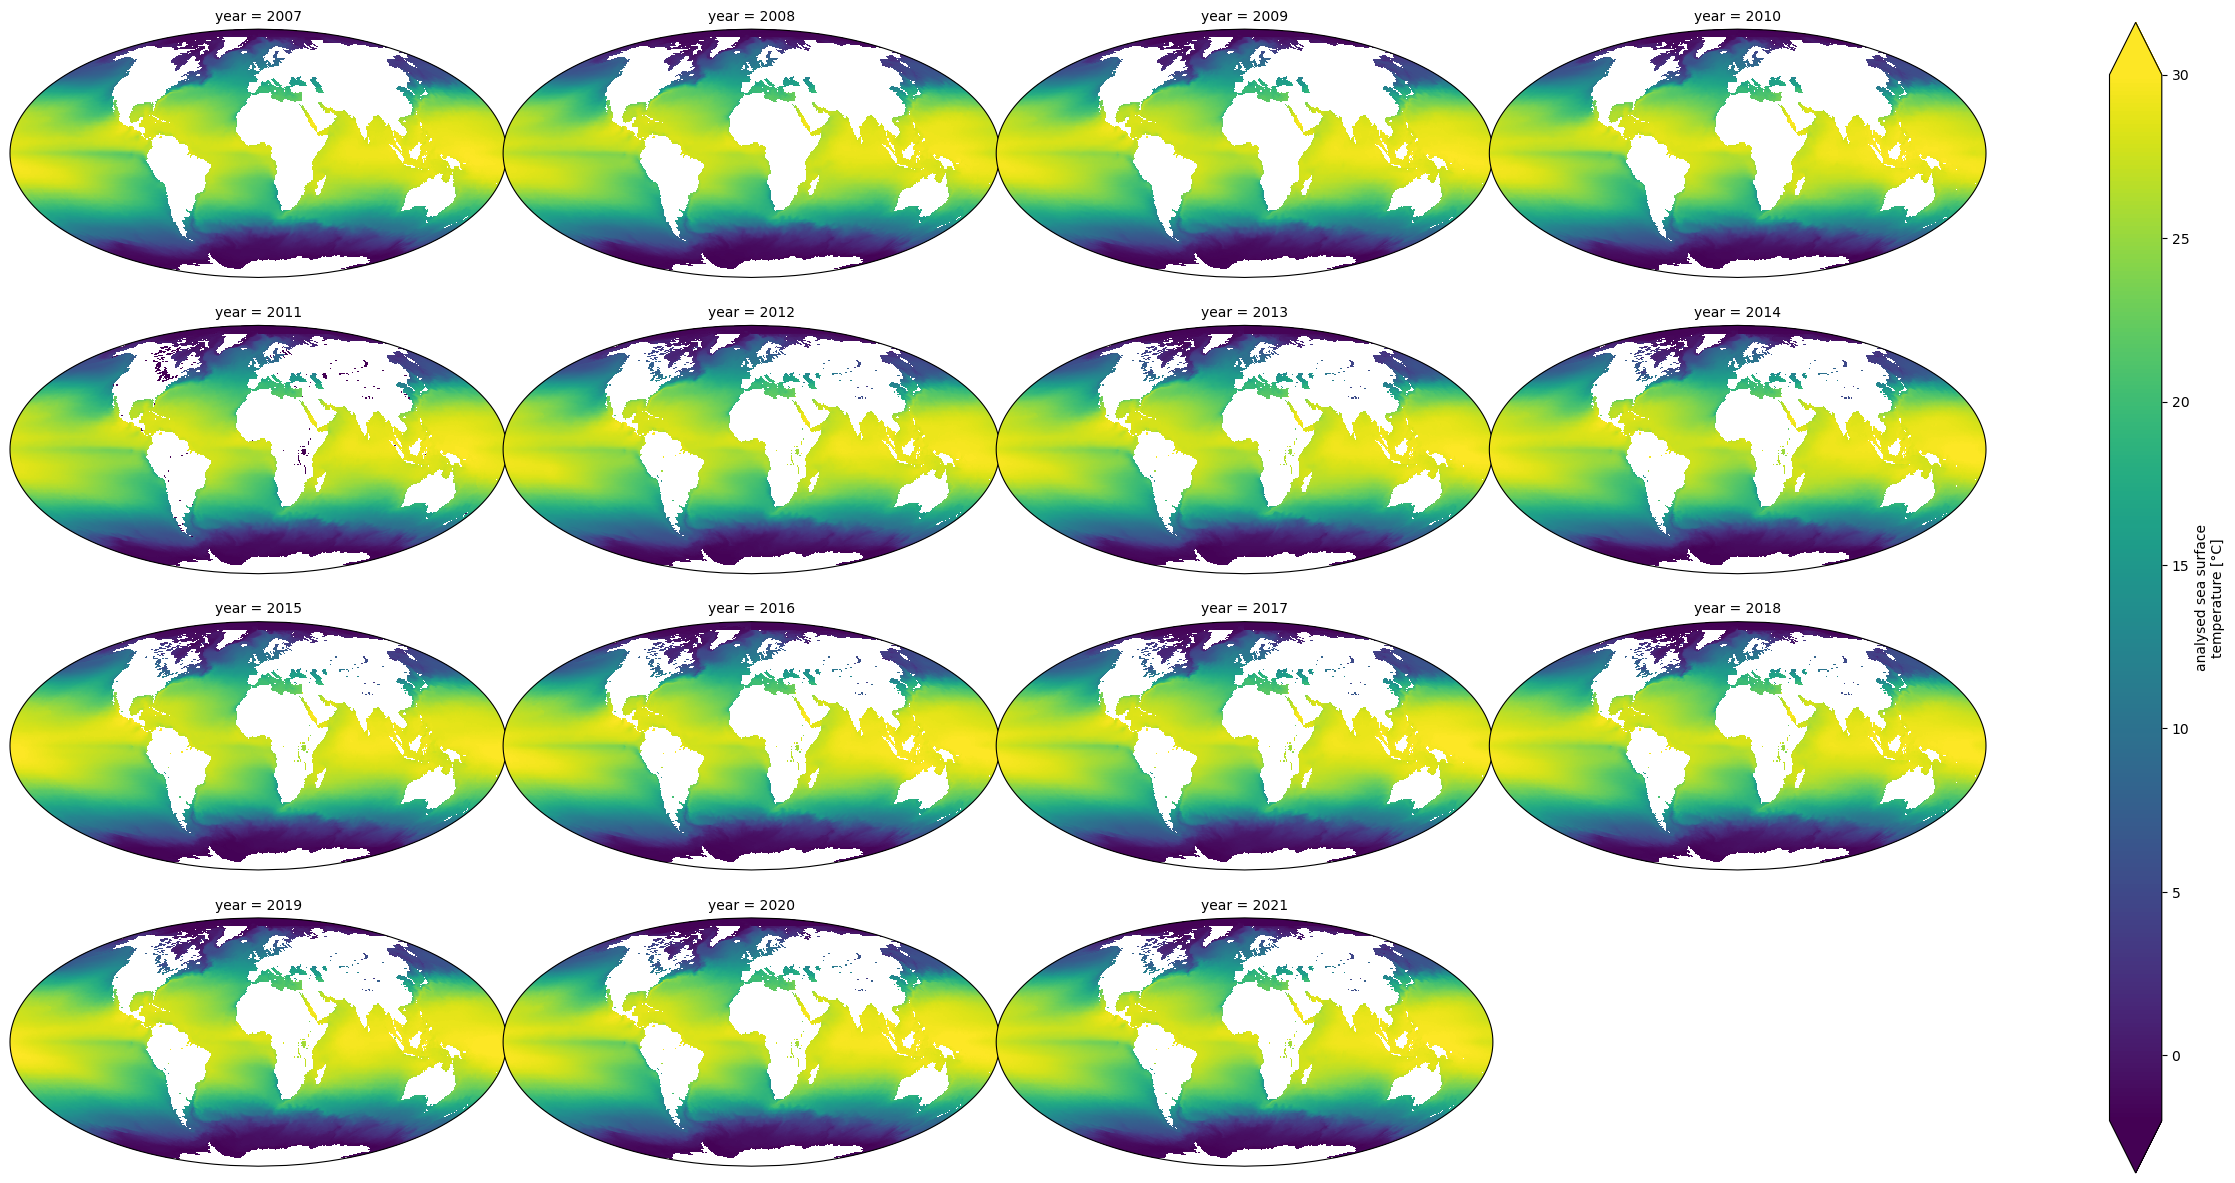

In [6]:
ds1_year\
    .plot(
        col='year', 
        col_wrap=4, 
        robust=True,
        vmin=-2, vmax=30,
        aspect=2, size=3,
        transform=ccrs.PlateCarree(), subplot_kws={'projection': ccrs.Mollweide()},
)

# Note that if the plots are running slowly, I recommend removing the last 2 lines
# (IE the transform and subplot_kws components)

### Interannual variability

The interannual variability will be assessed here by looking at the anomaly to the climatology.
We will do it for the seasons (`time.season`), but it can be done with any period (e.g. monthly).
The specific methods to use are `resample` in addition to the previous `groupby`. 
A useful keyword for resample will be `QS-DEC`.

_Can you observe any long term change over this period?_ 

_Can you see any relationship between year-to-year variability and the timeseries below of ENSO?_

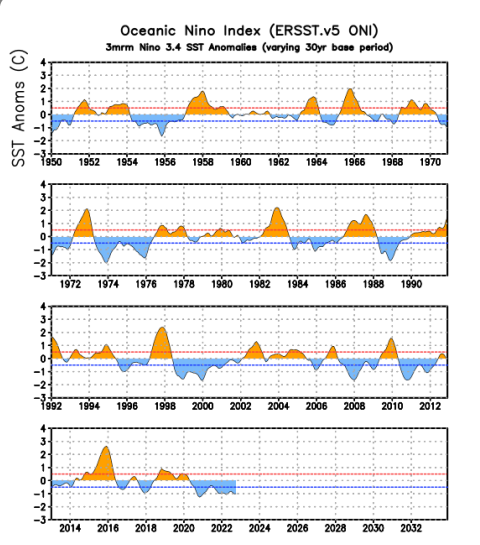

You might refer to the following website for more information on interpreting the strongest variability:
https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php


You might wish to change the central longitude in the projection (e.g. if you use Mollweide) 
from the default `central_longitude=0`.



In [ ]:
(ds1.sst.resample(time='QS-DEC').mean(dim='time').groupby('time.season')\
     - ds1.sst.groupby('time.season').mean(dim='time'))

<xarray.DataArray 'sst' (time: 61, lat: 240, lon: 480)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 0.01887882,  0.01887882,  0.01887822, ...,  0.01932311,
          0.01910126,  0.01887882],
        [ 0.02354324,  0.02332091,  0.02332091, ...,  0.02354324,
          0.02354324,  0.02354324],
        [ 0.02433169,  0.02909958,  0.02909958, ...,  0.02433169,
          0.02433169,  0.02433169]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [-0.02599084, -0.025769  , -0.025769  , ..., -0.02621388,
         -0.02643633, -0.02621329],
        [-0.0159905 , -0.0159905 , -0.01643479, ..., -0.01576877,
         -0.01599121, -0.0159905 ],
        [-0.0088799 , -0.0088793 , -0.00821197, ..., -0.00954652,
         -0.00954592, -0.00954592]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.02109921, -0.02109921, -0.02109981, ..., -0.02065492,
         -0.02087677, -0.02109921],
        [-0.01643479, -0.01665711, -0.01665711, ..., -0.01643479,
         -0.01643479, -0.01643479],
        [-0.01065671, -0.01087844, -0.01087844, ..., -0.01065671,
         -0.01065671, -0.01065671]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.125 0.875 1.625 2.375 ... 357.1 357.9 358.6 359.4
  * lat      (lat) float32 -89.88 -89.12 -88.38 -87.62 ... 87.88 88.62 89.38
  * time     (time) datetime64[ns] 2006-12-01 2007-03-01 ... 2021-12-01
    season   (time) object 'DJF' 'MAM' 'JJA' 'SON' ... 'MAM' 'JJA' 'SON' 'DJF'

In [ ]:
(ds1.sst.resample(time='QS-DEC').mean(dim='time').groupby('time.season')\
     - ds1.sst.groupby('time.season').mean(dim='time'))\
          .mean(dim='time')

<xarray.DataArray 'sst' (lat: 240, lon: 480)>
array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       ...,
       [-1.27444495e-04, -1.27421052e-04, -1.27391744e-04, ...,
        -1.20127785e-04, -1.23799822e-04, -1.27458188e-04],
       [-5.09668571e-05, -5.45822222e-05, -5.46115334e-05, ...,
        -5.09746751e-05, -5.09922611e-05, -5.09570855e-05],
       [ 1.65329602e-05,  4.01051329e-05,  4.01305369e-05, ...,
         1.65251440e-05,  1.65075544e-05,  1.65095098e-05]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.125 0.875 1.625 2.375 ... 357.1 357.9 358.6 359.4
  * lat      (lat) float32 -89.88 -89.12 -88.38 -87.62 ... 87.88 88.62 89.38

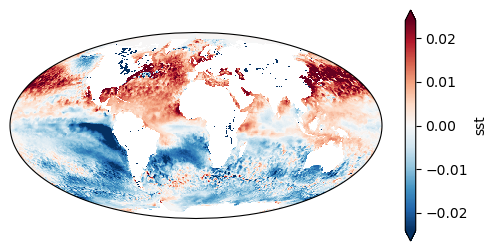

In [ ]:
(ds1.sst.resample(time='QS-DEC').mean(dim='time').groupby('time.season')\
     - ds1.sst.groupby('time.season').mean(dim='time'))\
          .mean(dim='time').plot(
              robust=True,
              aspect=2, size=3,
              transform=ccrs.PlateCarree(), subplot_kws={'projection': ccrs.Mollweide(central_longitude=0)}, )

We will now produce a "Hovmöller diagram":
https://en.wikipedia.org/wiki/Hovmöller_diagram

Similar to the previous figures, we focus on the anomaly to the climatology.
We will do a zonal Hovmöller diagram of the equatorial band `.sel(lat=slice(-5,5)).mean(dim='lat')` where the variability as seen above is the strongest.

We can select a band of longitude where the signal is the most coherent.
Plot it and interpret.

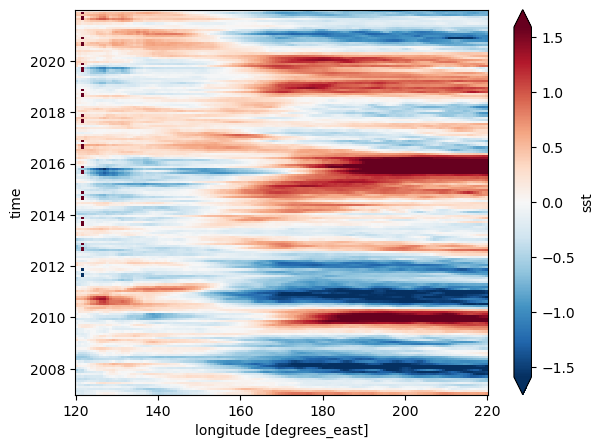

In [ ]:
(ds1.sst.groupby('time.month') - ds1.sst.groupby('time.month').mean(dim='time'))\
    .sel(lat=slice(-5,5)).mean(dim='lat')\
    .sel(lon=slice(120,220))\
    .plot(
        robust=True,
        size=5
    )

We can also look at how the global mean of SST evolves with time by averaging over longitude and latitude.

WARNING: the grid is regular and so the polar regions are over-represented for any averaging in the meridional (latitudinal) direction.
You should infer from the example below how to weight the grid:
https://xarray.pydata.org/en/stable/examples/area_weighted_temperature.html

You can assess the difference between the weighted and unweighted mean SST.
You might average the time series per year using `groupby('time.year')` to discard intra-annual/seasonal variability.
Plot and interpret the derived weighted time series. 

_Do any years stand out in these timeseries? Can you explain why?_

_Can you see any trends in mean temperature? Does this appear to be of similar magnitude to the changes that you expect from changes in atmospheric air temperature? What about differences can you see from the maps above? What do you think is causing this?_

_What differences can you observe between the weighted and unweighted mean SST? What is causing these differences?_

In [ ]:
ds1

<xarray.Dataset>
Dimensions:                 (lon: 480, lat: 240, time: 180)
Coordinates:
  * lon                     (lon) float32 0.125 0.875 1.625 ... 358.6 359.4
  * lat                     (lat) float32 -89.88 -89.12 -88.38 ... 88.62 89.38
  * time                    (time) datetime64[ns] 2007-01-15T12:00:00 ... 202...
Data variables:
    analysed_sst            (time, lat, lon) float32 nan nan nan ... 271.4 271.4
    standard_deviation_sst  (time, lat, lon) float32 ...
    sst                     (time, lat, lon) float32 nan nan nan ... -1.8 -1.8
Attributes: (12/46)
    Conventions:                CF-1.4
    title:                      Analysed monthly foundation sea surface tempe...
    references:                 Donlon, C.J., Martin, M., Stark, J.D., Robert...
    institution:                UKMO
    netcdf_version_id:          4.1
    product_version:            2.0
    ...                         ...
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

In [ ]:
weights = np.cos(np.deg2rad(ds1.sst.lat))
weights.name = "weights"
weights

<xarray.DataArray 'weights' (lat: 240)>
array([0.00218172, 0.01527103, 0.02835783, 0.04143966, 0.0545145 ,
       0.06758001, 0.08063382, 0.09367393, 0.10669798, 0.11970364,
       0.13268891, 0.14565133, 0.1585889 , 0.1714993 , 0.1843802 ,
       0.19722962, 0.21004525, 0.22282477, 0.23556623, 0.24826722,
       0.26092577, 0.27353963, 0.2861065 , 0.29862443, 0.3110911 ,
       0.3235046 , 0.33586264, 0.34816304, 0.36040387, 0.37258297,
       0.38469812, 0.39674744, 0.4087287 , 0.42064002, 0.43247926,
       0.4442443 , 0.45593333, 0.46754423, 0.4790749 , 0.49052358,
       0.50188816, 0.5131668 , 0.5243575 , 0.5354583 , 0.5464674 ,
       0.5573829 , 0.56820285, 0.5789255 , 0.5895489 , 0.60007125,
       0.6104908 , 0.62080574, 0.63101435, 0.64111483, 0.65110546,
       0.66098446, 0.6707503 , 0.68040115, 0.68993545, 0.6993515 ,
       0.7086478 , 0.71782255, 0.7268744 , 0.73580164, 0.74460286,
       0.7532765 , 0.76182103, 0.770235  , 0.7785171 , 0.78666574,
       0.7946796 , 0.80255723, 0.8102974 , 0.81789875, 0.82535994,
       0.8326797 , 0.8398568 , 0.84689   , 0.85377806, 0.8605198 ,
       0.8671142 , 0.87355995, 0.87985605, 0.88600135, 0.89199483,
       0.89783555, 0.9035224 , 0.9090544 , 0.9144306 , 0.9196502 ,
       0.92471224, 0.9296158 , 0.93436   , 0.9389442 , 0.9433675 ,
       0.94762915, 0.9517284 , 0.95566463, 0.9594371 , 0.9630451 ,
...
       0.9462266 , 0.941911  , 0.937434  , 0.93279636, 0.9279989 ,
       0.9230425 , 0.91792786, 0.91265595, 0.90722764, 0.90164393,
       0.8959057 , 0.89001393, 0.8839697 , 0.877774  , 0.8714279 ,
       0.86493254, 0.8582889 , 0.85149825, 0.84456164, 0.83748037,
       0.83025557, 0.82288855, 0.81538045, 0.8077327 , 0.79994655,
       0.79202336, 0.7839644 , 0.77577114, 0.76744497, 0.7589873 ,
       0.75039953, 0.74168324, 0.7328399 , 0.72387093, 0.7147779 ,
       0.7055624 , 0.69622606, 0.68677044, 0.6771971 , 0.6675077 ,
       0.657704  , 0.6477876 , 0.63776016, 0.6276234 , 0.6173792 ,
       0.60702914, 0.59657514, 0.5860188 , 0.57536215, 0.5646069 ,
       0.5537549 , 0.542808  , 0.53176814, 0.5206371 , 0.50941694,
       0.4981094 , 0.48671663, 0.47524038, 0.46368265, 0.4520456 ,
       0.44033098, 0.42854092, 0.4166775 , 0.40474263, 0.3927385 ,
       0.38066694, 0.36853018, 0.3563304 , 0.34406942, 0.33174962,
       0.31937286, 0.30694136, 0.2944574 , 0.28192288, 0.26934004,
       0.25671116, 0.24403816, 0.2313235 , 0.21856907, 0.20577718,
       0.19295016, 0.18008997, 0.16719891, 0.15427932, 0.14133318,
       0.12836295, 0.11537059, 0.10235848, 0.08932894, 0.07628398,
       0.06322594, 0.05015719, 0.03707973, 0.02399603, 0.01090811],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.88 -89.12 -88.38 -87.62 ... 87.88 88.62 89.38
Attributes:
    long_name:      latitude
    standard_name:  latitude
    axis:           Y
    units:          degrees_north
    valid_min:      -90.0
    valid_max:      90.0
    comment:         Latitude geographical coordinates,WGS84 projection

In [ ]:
sst_weighted = ds1.sst.weighted(weights)
sst_weighted

DataArrayWeighted with weights along dimensions: lat

In [ ]:
weighted_mean = sst_weighted.mean(("lon", "lat"))
weighted_mean


<xarray.DataArray 'sst' (time: 180)>
array([18.210974, 18.355597, 18.329094, 18.26858 , 18.180956, 18.210617,
       18.28817 , 18.353914, 18.255533, 17.984657, 17.824255, 17.855661,
       18.011147, 18.17506 , 18.244757, 18.188482, 18.131582, 18.137465,
       18.320717, 18.422773, 18.325808, 18.105515, 17.945211, 18.004599,
       18.17273 , 18.290602, 18.337685, 18.303839, 18.269964, 18.338337,
       18.433592, 18.514463, 18.364521, 18.200796, 18.079033, 18.177935,
       18.327515, 18.47201 , 18.496408, 18.443083, 18.328749, 18.309711,
       18.397696, 18.470787, 18.342691, 18.068253, 17.901367, 17.944765,
       18.095018, 18.267973, 18.30887 , 18.258087, 18.19221 , 18.202927,
       18.313501, 16.601006, 16.466385, 18.016163, 16.520107, 17.823689,
       17.995726, 18.168873, 18.202614, 18.220821, 18.233446, 18.243225,
       18.408634, 18.508675, 18.395472, 18.163704, 18.029474, 18.06305 ,
       18.139822, 18.279993, 18.31529 , 18.2567  , 18.18748 , 18.200256,
       18.40179 , 18.501875, 18.359112, 18.098429, 17.96709 , 18.0029  ,
       18.15426 , 18.272997, 18.323963, 18.31531 , 18.317429, 18.325209,
       18.458773, 18.578766, 18.452093, 18.183826, 18.023575, 18.052284,
       18.183765, 18.321814, 18.365149, 18.364265, 18.350082, 18.381632,
       18.525166, 18.648874, 18.560726, 18.368174, 18.223928, 18.286541,
       18.454163, 18.521242, 18.612787, 18.537437, 18.484005, 18.516943,
       18.63556 , 18.691   , 18.496805, 18.24307 , 18.102884, 18.155758,
       18.360392, 18.530176, 18.552624, 18.492828, 18.388039, 18.40085 ,
       18.570087, 18.649002, 18.504278, 18.265186, 18.118847, 18.091406,
       18.250292, 18.369768, 18.436577, 18.388695, 18.361662, 18.33477 ,
       18.425486, 18.535753, 18.476717, 18.31682 , 18.16437 , 18.187155,
       18.321762, 18.478949, 18.520777, 18.47832 , 18.437578, 18.467165,
       18.591673, 18.670591, 18.52431 , 18.342636, 18.199976, 18.241735,
       18.408653, 18.528717, 18.592157, 18.545397, 18.445568, 18.4508  ,
       18.571335, 18.684612, 18.543003, 18.297295, 18.109829, 18.09901 ,
       18.265228, 18.379692, 18.438272, 18.402025, 18.35545 , 18.38553 ,
       18.533978, 18.633514, 18.52303 , 18.271418, 18.15707 , 18.146404],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2007-01-15T12:00:00 ... 2021-12-15T12:00:00

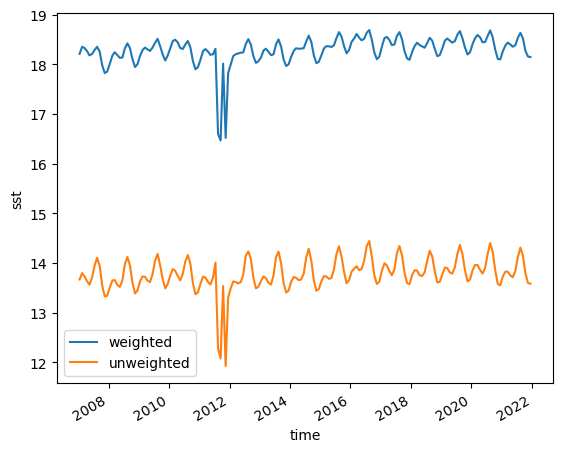

In [ ]:
weighted_mean.plot(label="weighted")
(ds1.sst.mean(("lon", "lat"))).plot(label="unweighted")

plt.legend()

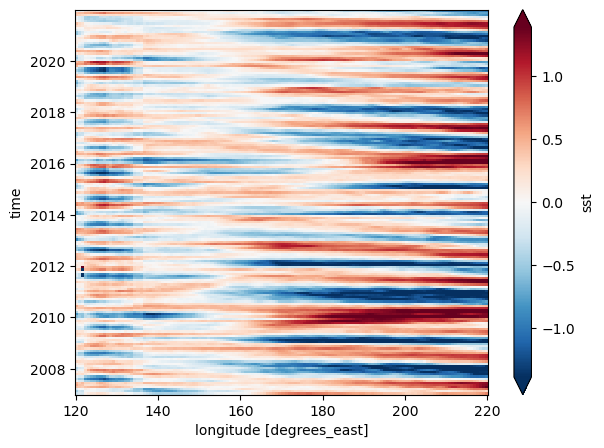

In [ ]:
(ds1.sst.groupby('time.year') - ds1.sst.groupby('time.year').mean(dim='time'))\
    .sel(lat=slice(-5,5)).mean(dim='lat')\
    .sel(lon=slice(120,220))\
    .plot(
        robust=True,
        size=5
    )

In [ ]:
weighted_mean


<xarray.DataArray 'sst' (time: 180)>
array([18.210974, 18.355597, 18.329094, 18.26858 , 18.180956, 18.210617,
       18.28817 , 18.353914, 18.255533, 17.984657, 17.824255, 17.855661,
       18.011147, 18.17506 , 18.244757, 18.188482, 18.131582, 18.137465,
       18.320717, 18.422773, 18.325808, 18.105515, 17.945211, 18.004599,
       18.17273 , 18.290602, 18.337685, 18.303839, 18.269964, 18.338337,
       18.433592, 18.514463, 18.364521, 18.200796, 18.079033, 18.177935,
       18.327515, 18.47201 , 18.496408, 18.443083, 18.328749, 18.309711,
       18.397696, 18.470787, 18.342691, 18.068253, 17.901367, 17.944765,
       18.095018, 18.267973, 18.30887 , 18.258087, 18.19221 , 18.202927,
       18.313501, 16.601006, 16.466385, 18.016163, 16.520107, 17.823689,
       17.995726, 18.168873, 18.202614, 18.220821, 18.233446, 18.243225,
       18.408634, 18.508675, 18.395472, 18.163704, 18.029474, 18.06305 ,
       18.139822, 18.279993, 18.31529 , 18.2567  , 18.18748 , 18.200256,
       18.40179 , 18.501875, 18.359112, 18.098429, 17.96709 , 18.0029  ,
       18.15426 , 18.272997, 18.323963, 18.31531 , 18.317429, 18.325209,
       18.458773, 18.578766, 18.452093, 18.183826, 18.023575, 18.052284,
       18.183765, 18.321814, 18.365149, 18.364265, 18.350082, 18.381632,
       18.525166, 18.648874, 18.560726, 18.368174, 18.223928, 18.286541,
       18.454163, 18.521242, 18.612787, 18.537437, 18.484005, 18.516943,
       18.63556 , 18.691   , 18.496805, 18.24307 , 18.102884, 18.155758,
       18.360392, 18.530176, 18.552624, 18.492828, 18.388039, 18.40085 ,
       18.570087, 18.649002, 18.504278, 18.265186, 18.118847, 18.091406,
       18.250292, 18.369768, 18.436577, 18.388695, 18.361662, 18.33477 ,
       18.425486, 18.535753, 18.476717, 18.31682 , 18.16437 , 18.187155,
       18.321762, 18.478949, 18.520777, 18.47832 , 18.437578, 18.467165,
       18.591673, 18.670591, 18.52431 , 18.342636, 18.199976, 18.241735,
       18.408653, 18.528717, 18.592157, 18.545397, 18.445568, 18.4508  ,
       18.571335, 18.684612, 18.543003, 18.297295, 18.109829, 18.09901 ,
       18.265228, 18.379692, 18.438272, 18.402025, 18.35545 , 18.38553 ,
       18.533978, 18.633514, 18.52303 , 18.271418, 18.15707 , 18.146404],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2007-01-15T12:00:00 ... 2021-12-15T12:00:00

In [ ]:
# (weighted_mean.groupby('time.year') - weighted_mean.groupby('time.year').mean(dim='time'))\
#     .sel(lat=slice(-5,5)).mean(dim='lat')\
#     .sel(lon=slice(120,220))\
#     .plot(
#         robust=True,
#         size=5
#     )

# Sea Surface Salinity

In the previous section we did a quick preanalysis of SST variability. We do the same for other variables, here SSS.

The Sea Surface Salinity product proposed here is taken from
the ESA Climate Change Initiative for Sea Surface Salinity:
https://climate.esa.int/en/projects/sea-surface-salinity/

It is a Level-4 product which combines SMOS, Aquarius and SMAP data.

## load data
The data have already been compiled in a single file `CCISSSv3_sub3.nc` that you downloaded from Google Drive  (and subsetted for practical purposes).

You need to update the variable `fname` in order to correspond to the path of your file from the path of your notebook.

In [16]:
fname = './data/CCISSSv3_sub3.nc' #'./data/CCISSSv3_all.nc'
ds2 = xr.open_dataset(fname)

Similarly to the SST, start by exploring the dataset (attributes, dimension, first plots 2D, histogram, ...)
before diving into a preliminary data analysis. Look at the variables, grid, quality control (QC) flag, ...




## Data analysis

For this preliminary data analysis, you can follow the same steps as for SST, i.e. looking at the distribution; mean/std in time and/or longitude; anomaly to the means; seasonal variability; interannual variability; ...

For each step, interpret what are the obvious features (maxima, minima) and suggest some hypothesis for the underlying processes.

Keep in mind, sea surface salinity is a tracer of the freshwater cycle (evaporation, precipitation, runoff) and of water mass circulation (ocean current). You can base your interpretation on the knowledge you have of the freshwater cycle
over land (rainforest, desert, ...).

_Can you link the patterns in SSS with the water cycle or other atmospheric phenomena?_

_Is there anywhere with notble anomalies that you can't explain by atmospheric processes? Any ideas what might be driving these?_

_What do you notice about the seasonal cycle of in SSS? Any ideas what might drive this variability?_

_Can you see any long term changes in SSS? What about year-to-year variability, does this resemble variability in SST?_ 

You can compare with what you obtained with the SST, particularly on the spatio-temporal and interannual variability.


In [17]:
ds2

<xarray.Dataset>
Dimensions:           (lon: 463, lat: 195, time: 128)
Coordinates:
  * lon               (lon) float32 -179.9 -179.1 -178.3 ... 178.1 178.8 179.6
  * lat               (lat) float32 -83.52 -79.57 -76.74 ... 75.92 78.55 81.98
  * time              (time) datetime64[ns] 2010-02-01 2010-03-01 ... 2020-09-01
Data variables:
    sss               (time, lat, lon) float32 ...
    sss_random_error  (time, lat, lon) float32 ...
    noutliers         (time, lat, lon) int16 ...
    total_nobs        (time, lat, lon) int16 ...
    pct_var           (time, lat, lon) float32 ...
    sss_qc            (time, lat, lon) int8 ...
    lsc_qc            (time, lat, lon) int8 ...
    isc_qc            (time, lat, lon) int8 ...
Attributes: (12/42)
    creation_time:             27-Apr-2021 00:36:29
    title:                     ESA CCI Sea Surface Salinity ECV produced at a...
    institution:               ACRI-ST,LOCEAN
    source:                    SMOS CCI v3 L2OS reprocessing (ERA5,ref OTT SS...
    history:                    
    references:                http://cci.esa.int/salinity - DOI:XXXXX
    ...                        ...
    time_coverage_end:         20100216T235959Z
    time_coverage_duration:    P1M
    time_coverage_resolution:  P15D
    id:                        ESACCI-SEASURFACESALINITY-L4-SSS-MERGED_OI_Mon...
    tracking_id:               d9836c74-bacf-4a6d-b747-546bb2e38293
    spatial_grid:              25km EASE 2 cylindrical grid

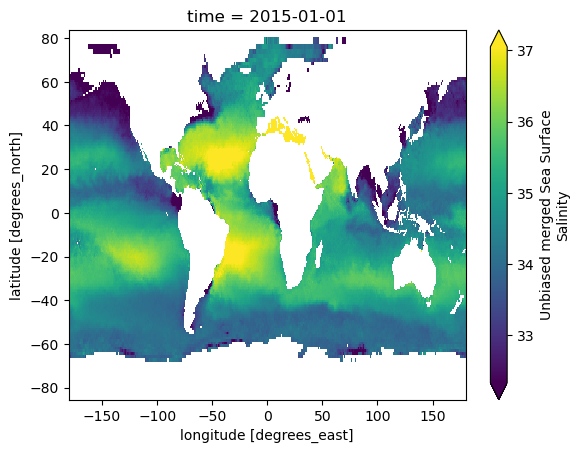

In [18]:
sel_date = '2015-01-01'
ds2.sss.sel(time=sel_date).plot(robust=True)

(array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 2.000000e+00, 4.000000e+00,
        1.500000e+01, 7.000000e+01, 6.160000e+02, 6.510000e+02,
        8.050000e+02, 1.310000e+02, 3.100000e+01, 6.000000e+00,
        1.500000e+01, 1.400000e+01, 2.300000e+01, 2.300000e+01,
        3.100000e+01, 6.000000e+01, 2.150000e+02, 3.941000e+03,
        1.510000e+02, 1.720000e+02, 2.660000e+02, 3.050000e+02,
        3.770000e+02, 5.360000e+02, 8.100000e+02, 1.339000e+03,
        3.527000e+03, 8.454000e+03, 5.655000e+03, 1.463800e+04,
        5.171000e+04, 3.102060e+05, 1.182958e+06, 2.555339e+06,
        2.303529e+06, 8.690530e+05, 1.531610e+05, 2.190100e+04,
        1.366200e+04, 1.050000e+03, 4.700000e+01, 2.400000e+01,
        2.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00]),
 array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
        12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23

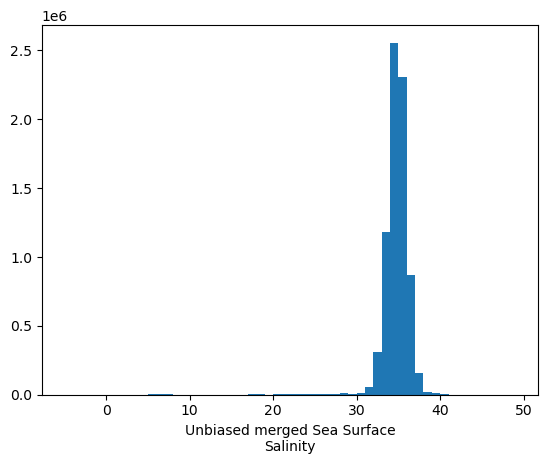

In [19]:
# plot.hist

ds2.sss.plot.hist(bins=np.arange(-5,50,1))

In [20]:
# mean, std

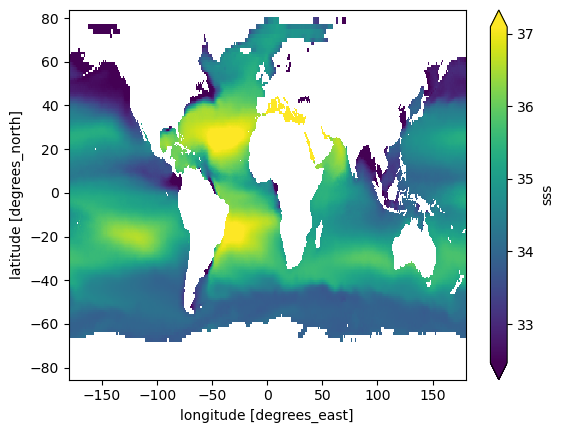

In [21]:
ds2.sss.mean(dim='time').plot(robust=True)
# I recommend to do one cell per plot, there is no obligation,
# but I find it easier to modify my code/figure

c:\Users\s2112771\Anaconda3\envs\sensecdt_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


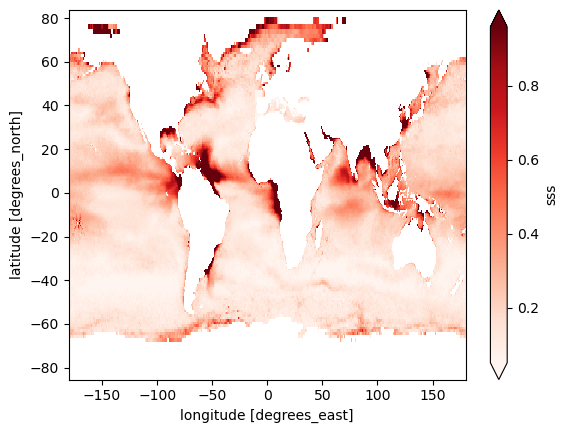

In [22]:
# std
ds2.sss.std(dim='time').plot(robust=True,cmap='Reds')


In [ ]:
# Anomaly to Zonal Average

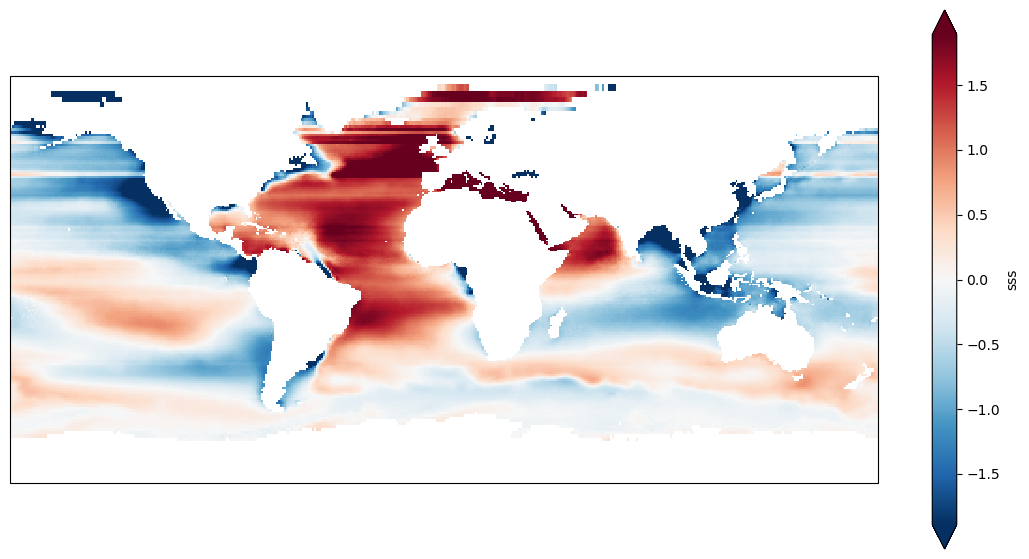

In [23]:
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide())
ax.coastlines(zorder=4)

# One way to substract one dataset to another could be:
(ds2.sss.mean(dim='time') - ds2.sss.mean(dim=['time','lon'])).plot( robust=True)

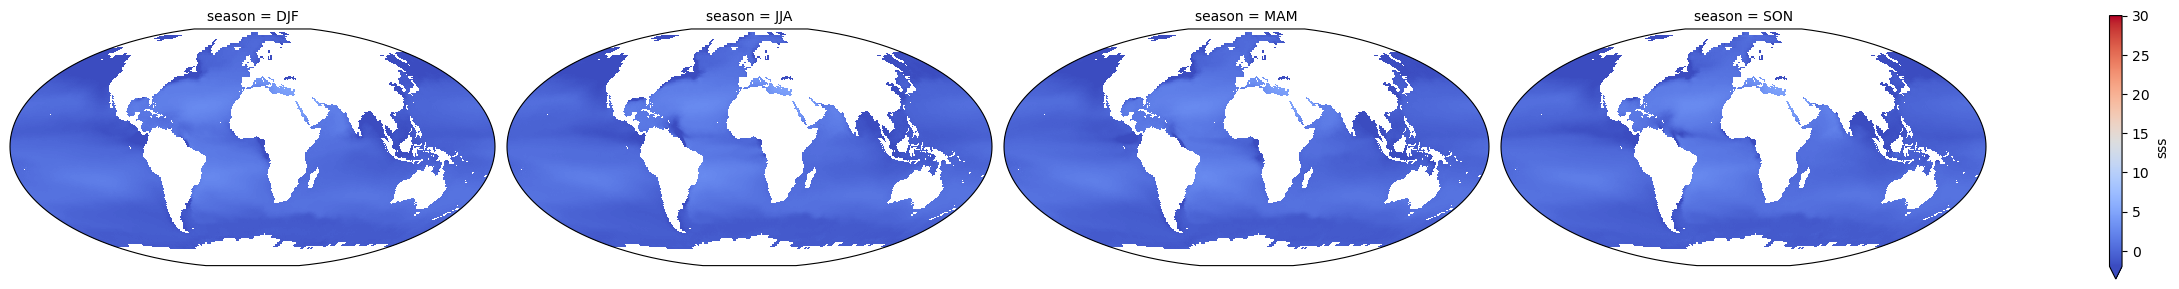

In [24]:
# Climatology anomaly to the mean
# Remove the annual, temporal mean or any other meaningful 'mean' to 
# the climatology to highlight the seasonal variability
# (ds1.sst.mean(dim='time') - ds1.sst.mean(dim=['time','lon']))

(ds2.sss.groupby('time.season').mean(dim='time')- np.nanmean(ds2.sss.values))\
    .plot(
        col='season', 
        col_wrap=4, 
        robust=True,
        vmin=-2, vmax=30,
        aspect=2, size=3,
        transform=ccrs.PlateCarree(), subplot_kws={'projection': ccrs.Mollweide()},
        cmap='coolwarm'
)


In [ ]:
# Anomaly to the climatology

In [ ]:
# Hövmoller of the equatorial band


# Sea Level

The Mean Sea Level Anomaly product proposed here is a Global Sea Level (Sea Surface Heights) gridded Level-4 Monthly products taken from:

https://resources.marine.copernicus.eu/product-detail/SEALEVEL_GLO_PHY_L4_MY_008_047/INFORMATION

https://doi.org/10.48670/moi-00148

The time series is particularly long (1993-2020) compared to the ones we used for SST and SSS and can give us access to the observed trend linked to global warming.

_What can you observe in terms of long term change in sea level?_

_Do yo you notice any similarities in year-to-year variability in sea level and SST/SSS?_

## load data
The data have already been compiled in a single file `AvisoMonthly_all.nc` that you downloaded from Google Drive.

You need to update the variable `fname` in order to correspond to the path of your file from the path of your notebook.

In [ ]:
fname = './data/AvisoMonthly_all.nc'
ds3 = xr.open_dataset(fname)

Similarly to the SST, you should start by exploring the dataset (attributes, dimension, first plots 2D, histogram, ...)
before diving into a preliminary data analysis. Question yourself about variables, grid, quality control (QC) flag, ...




## Data analysis

For this preliminary data analysis, you can follow the same steps as for SST/SSS, i.e. looking at the distribution; mean in time and/or longitude; anomaly to the means; seasonal variability; interannual variability; ...

For each step, interpret what are the obvious features and suggest some hypothesis for the underlying processes.

Keep in mind, sea level is linked to steric height and ocean circulation (including eddies).

You can compare with what you obtained with the SST/SSS, particularly on seasonal and interannual variability.


In [ ]:
ds3

In [ ]:
sel_date = '2015-01-15'
ds3.sla.sel(time=sel_date).plot(robust=True)

In [ ]:
# hist

In [ ]:
# mean, std

In [ ]:
# seasonal cycle

In [ ]:
# anomaly to the climatology

In [ ]:
# Hövmoller of the equatorial band

In [ ]:
# global mean time serie of weighted Sea Level

In [ ]:
# global mean time serie of weighted Sea Level with yearly mean